In [82]:
import matplotlib.pyplot as plt
from copy import deepcopy

In [29]:
def Zs(x, y, z):
    return z * x * y + y

def Ys(x, y, z):
    return x * z - 2 * y

In [30]:
def euler_cauchy(l, r, h, x0, y0, z0):
    ans = {
        'x': [x0],
        'y': [y0],
        'z': [z0]
    }
    while x0 + h <= r:
        x1 = x0 + h
        y1s = y0 + h * Ys(x0, y0, z0)
        z1s = z0 + h * Zs(x0, y0, z0)
        y1 = y0 + h * (Ys(x0, y0, z0) + Ys(x1, y1s, z1s)) / 2.0
        z1 = z0 + h * (Zs(x0, y0, z0) + Zs(x1, y1s, z1s)) / 2.0
        ans['x'].append(x1)
        ans['y'].append(y1)
        ans['z'].append(z1)
        x0 = x1
        y0 = y1
        z0 = z1
    return ans

In [31]:
l, r, h = 0.0, 1.0, 0.1
x0, y0, z0 = 0.0, 3.0, -1.0

In [32]:
xyz = euler_cauchy(l, r, h, x0, y0, z0)

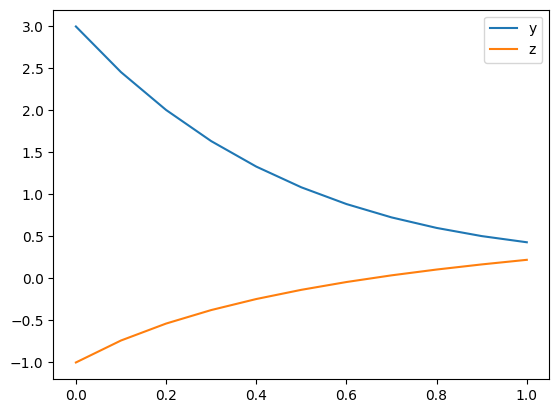

In [33]:
plt.plot(xyz['x'], xyz['y'])
plt.plot(xyz['x'], xyz['z'])
plt.legend(["y", "z"])

In [137]:
def Ys2(x, y):
    return 2.0 * y + x + y * x * x

In [138]:
def runge_kutta(l, r, h, x0, y0):
    ans = {
        'x': [x0],
        'y': [y0],
    }
    while x0 + h <= r:
        k1 = h * Ys2(x0, y0)
        k2 = h * Ys2(x0 + h / 2.0, y0 + k1 / 2.0)
        k3 = h * Ys2(x0 + h / 2.0, y0 + k2 / 2.0)
        k4 = h * Ys2(x0 + h, y0 + k3)
        x1 = x0 + h
        y1 = y0 + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        ans['x'].append(x1)
        ans['y'].append(y1)
        x0 = x1
        y0 = y1
    return ans

In [139]:
l, r, h = 0.0, 0.2, 0.1
x0, y0 = 0.0, 5.25

In [140]:
xy = runge_kutta(l, r, h, x0, y0)

In [141]:
adam_coefs = [1.0, 1.0 / 2.0, 5.0 / 12.0, 3.0 / 8.0, 251.0 / 720.0, 95.0 / 283.0]

def adams(l, r, h, steps, xy):
    xy = deepcopy(xy)
    while xy['x'][-1] + h <= r:
        yi = xy['y'][-steps:]
        xi = xy['x'][-steps:]
        yis = [Ys2(x, y) for x, y in zip(xi, yi)]
        deltas = {0: yis}
        for i in range(1, steps):
            H = h if i == 1 else 1.0
            deltas[i] = [H * (deltas[i-1][j] - deltas[i-1][j-1]) for j in range(1, len(deltas[i-1]))]
        sum = 0.0
        delta = 0.0
        for i in range(steps):
            H = h if i == 0 else 1.0
            delta += H * adam_coefs[i] * deltas[i][-1]
        xy['x'].append(xy['x'][-1] + h)
        xy['y'].append(xy['y'][-1] + delta)
    return xy

In [142]:
l, r, h, steps = 0.2, 1.0, 0.1, 3
xy = adams(l, r, h, steps, xy)

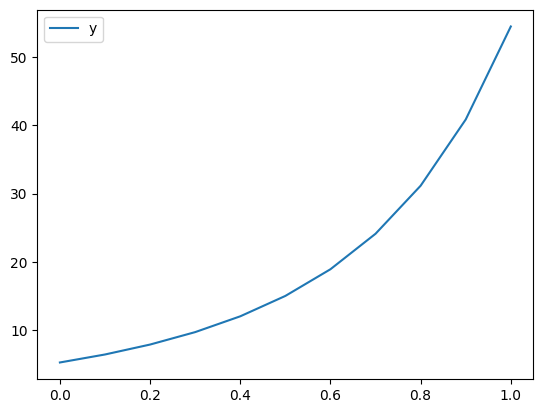

In [143]:
plt.plot(xy['x'], xy['y'])
plt.legend(["y"])